# How to use `TESS-SIP`

In [5]:
from tess_sip import SIP
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## With `TargetPixelFiles`

In [16]:
# Download target pixel files
# We're using TOI-700
tpfs = lk.search_targetpixelfile('TIC 150428135', mission='TESS', author='SPOC', exptime=120).download_all()

In [17]:
# Run SIP
r = SIP(tpfs, min_period=10, max_period=80)

Running pixels in aperture: 100%|██████████| 300/300 [01:26<00:00,  3.46it/s]


[(0.9, 1.1)]

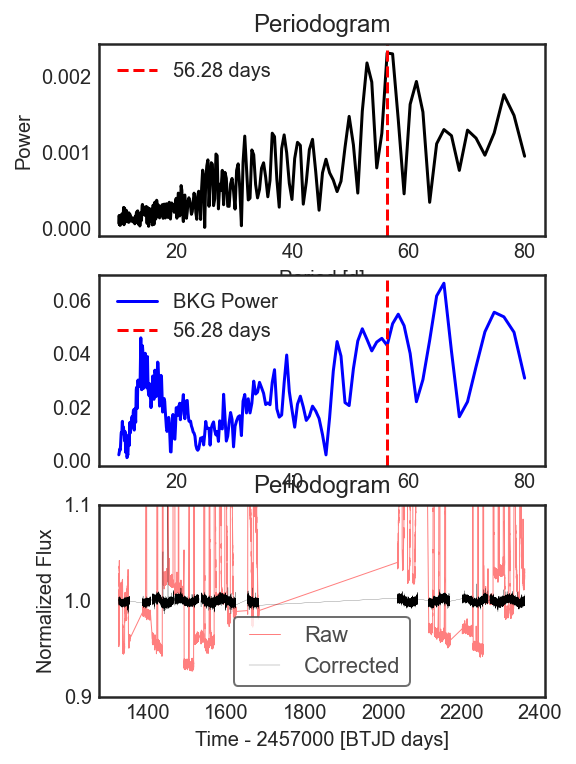

In [24]:
# Example plotting
fig, axs = plt.subplots(3, figsize=(6, 6))
axs[0].plot(r['periods'], r['power'], c='k')
axs[0].set(xlabel='Period [d]', ylabel='Power', title='Periodogram')
axs[0].axvline(r['period_at_max_power'], color='r', ls='--', label=f"{r['period_at_max_power']:0.2f} days")
axs[0].legend()
axs[1].plot(r['periods'], r['power_bkg'], c='b', label='BKG Power')
axs[1].axvline(r['period_at_max_power'], color='r', ls='--', label=f"{r['period_at_max_power']:0.2f} days")
axs[1].legend()
axs[2].set(xlabel='Period [d]', ylabel='Power', title='Periodogram')
r['raw_lc'].plot(ax=axs[2], c='r', label='Raw', alpha=0.5)
r['corr_lc'].plot(ax=axs[2], c='k', label='Corrected', lw=0.1)
axs[2].set(ylim=(0.9, 1.1))
plt.savefig('demo1.png', dpi=200, bbox_inches='tight')

## With `LightCurveFiles`

In [27]:
# Download target pixel files
# We're using TOI-700
lcfs = lk.search_lightcurvefile('TIC 150428135', mission='TESS', author='SPOC', exptime=120).download_all()

/Users/ch/Library/Caches/pypoetry/virtualenvs/tess-sip-hYZL-lYV-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
# Run SIP
r = SIP(tpfs, min_period=10, max_period=80)

Running pixels in aperture:  34%|███▍      | 103/300 [00:28<00:53,  3.66it/s]


KeyboardInterrupt: 

In [ ]:
# Example plotting
fig, axs = plt.subplots(2, figsize=(4, 6))
axs[0].plot(r['periods'], r['power'], c='k')
axs[0].set(xlabel='Period [d]', ylabel='Power', title='Periodogram')
axs[0].axvline(r['period_at_max_power'], color='r', ls='--', label=f"{r['period_at_max_power']:0.2f} days")
axs[0].legend()
r['raw_lc'].plot(ax=axs[1], c='r', label='Raw', alpha=0.5)
r['corr_lc'].plot(ax=axs[1], c='k', label='Corrected', lw=0.1)
axs[1].set(ylim=(0.9, 1.1))
plt.savefig('demo2.png', dpi=200, bbox_inches='tight')